In [1]:
data_final = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/suyashlakhani/tweets2")

22/12/05 09:34:23 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


**4. Where are these Twitterers (all of them, not just influencers) located?**

In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pyspark.sql.functions as F
from pyspark.sql.functions import *
from pyspark.sql.types import *
pd.set_option("max_colwidth", 100)

from IPython.display import clear_output
clear_output(wait = False)

from google.cloud import storage

spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [3]:
data_final.limit(5).toPandas()

,created_at,user,user_id,user_name,user_description,followers_count,quote_count,retweeted_status,retweet_count,favorite_count,text,verified_user,user_location
0,Wed Aug 24 17:29:41 +0000 2022,"(False, Mon Oct 04 18:02:23 +0000 2021, True, False, Pro Medical Choice, Forest bather, Outdoors...",1445086760938127372,Kevster,"Pro Medical Choice, Forest bather, Outdoors enthusiast, Respectful.",147,11,"(None, Wed Aug 24 13:42:50 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",88,290,"RT @AndrewLawton: ""Western knows its vaccine mandate won’t protect students. The university just...",False,None
1,Wed Aug 24 17:29:42 +0000 2022,"(False, Sun Apr 26 02:15:57 +0000 2009, False, False, Visit Our New Ruined Downtown, #maga, #Ame...",35375399,Daniel Lewis,"Visit Our New Ruined Downtown, #maga, #America First\nNo d/m's",1161,5,"(None, Wed Aug 24 17:15:05 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",94,334,"RT @StephenM: Here’s what we should do re: college debt — tax university endowments, using the f...",False,Sarasota Florida
2,Wed Aug 24 17:29:42 +0000 2022,"(False, Wed Oct 13 02:30:05 +0000 2021, True, False, Check out the recent history of the grossly...",1448113670802837514,"William Turner, PhD, JD",Check out the recent history of the grossly degraded Republican Party in my new book: https://ww...,521,31,"(None, Tue Aug 23 20:14:22 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",1198,9651,"RT @fuckyouiquit: If they cancelled all student debt, made college free, and gave everyone unive...",False,"Ph.D. US History, JD"
3,Wed Aug 24 17:29:42 +0000 2022,"(False, Sat Mar 19 18:51:25 +0000 2022, True, False, @SFSU ‘07 | Healing with essential oils | G...",1505255578163056644,Cari🌿,@SFSU ‘07 | Healing with essential oils | Gallbladder removed June. Supporter of HRH Princess Be...,13,0,None,0,0,@SenRonJohnson Republicans also went to college and will benefit from this announcement from POT...,False,None
4,Wed Aug 24 17:29:43 +0000 2022,"(False, Mon Jul 04 20:50:56 +0000 2022, True, False, #BreakTheSilence, 6130, 46, 45, False, 1544...",1544060980656840704,Tefera Degefu,#BreakTheSilence,46,2,"(None, Wed Aug 24 15:43:34 +0000 2022, None, ([], None, [], [Row(display_url='twitter.com/i/web/...",40,31,"RT @Sultan_Abagissa: The TPLF, which has no notion of peace, took advantage of the chance to for...",False,None


In [5]:
location = data_final.groupby("user_location").count().orderBy('count',ascending=False).limit(20).toPandas()
location

,user_location,count
0,None,7889440
1,United States,376205
2,USA,133122
3,"Los Angeles, CA",129340
4,"California, USA",122255
5,"Lagos, Nigeria",116515
6,India,115840
7,"Texas, USA",106163
8,Nigeria,101919
9,"Chicago, IL",96695


<AxesSubplot:xlabel='count', ylabel='user_location'>

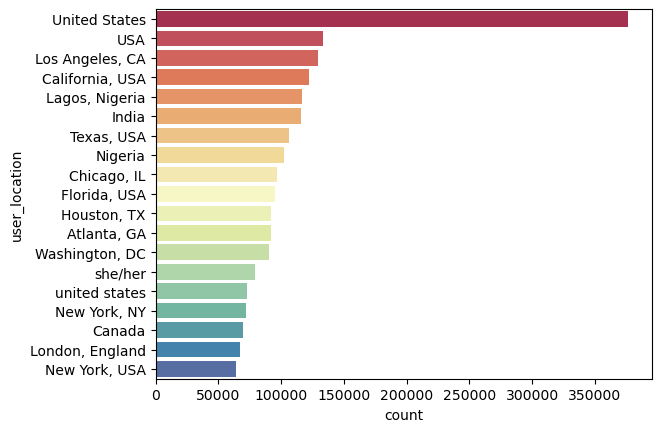

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.tight_layout()
sns.barplot(y="user_location",x="count",data=location[1:],palette="Spectral")

--> We can see that most of the twitterers are located in the United States followed by Nigeria, India, Canada and England.